In [1]:
!pip install -U transformers[torch]
!pip install -U huggingface_hub
!pip install evaluate
!pip install sacrebleu
!pip install rouge_score
!pip install -U nltk
#!pip install bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [2]:
!git clone https://github.com/ryanzhumich/AESLC

Cloning into 'AESLC'...
remote: Enumerating objects: 17469, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 17469 (delta 1), reused 0 (delta 0), pack-reused 17461 (from 1)
Receiving objects: 100% (17469/17469), 7.36 MiB | 7.06 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Updating files: 100% (18304/18304), done.


In [3]:
#!ls
!ls AESLC/enron_subject_line

dev  test  train


In [4]:
train_path = './AESLC/enron_subject_line/train'
val_path = './AESLC/enron_subject_line/dev'
test_path = './AESLC/enron_subject_line/test'

In [5]:
import pandas as pd
import os

In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [7]:
df = pd.DataFrame(columns=["Email", "Subject"])

for filename in os.listdir(train_path):
    with open(os.path.join(train_path,filename)) as f:
        content = f.read().split('@subject\n')
        df = pd.concat([df, pd.DataFrame.from_records([{"Email": content[0], "Subject": content[1]}])], ignore_index = True)

df

,Email,Subject
0,JSavitt@nyiso.com writes to the NYISO_TECH_EXC...,Price Reservations for the 14 July RTM and 15 ...
1,"Joint Center Update 01-07 June 6, 2001 UPCOMI...",Joint Center Update 01-07
2,"Ellen, I believe these are the deals that nee...",Confirmation on Riceland/Ralaco - 969604 & 939536
3,"Pat, Please move the following counterparties...",CP changes and new values
4,"Dale, since Okaloosa turned back all of their ...",Okaloosa's NNTS for April and October
...,...,...
14431,There are 5 GSS (Corp) employees transferring ...,ETS Transfers In/Out
14432,Throughout this holiday season we have been re...,"Messages of the Season from Bob Sherrer, Chair..."
14433,"At the recent DES meeting, I was given the ass...",Turbine Change out Letter
14434,Hi Sally - I hear that the luncheon today was ...,Girls Inc.


In [8]:
import re

In [9]:
df_val = pd.DataFrame(columns=["Email", "Subject", "Ann0", "Ann1", "Ann2"])
delimiters = r'@subject\n|\n\n@ann0\n|\n\n@ann1\n|\n\n@ann2\n'
for filename in os.listdir(val_path):
    with open(os.path.join(val_path,filename)) as f:
        content_val = f.read()
        split_string = re.split(delimiters,content_val)
        df_val = pd.concat([df_val,pd.DataFrame.from_records([{"Email": split_string[0], "Subject": split_string[1], "Ann0" : split_string[2], "Ann1" : split_string[3], "Ann2" : split_string[4]}])], ignore_index = True)

df_val

,Email,Subject,Ann0,Ann1,Ann2
0,Listened in on the analyst call this morning.\...,Highlights from this morning's ENE/DYN analyst...,notes from analyst call,notes from analyst call- litigation still unde...,analyst call notes
1,Dear Dr. Lay: I have worked for 4 years in Enr...,PERSONAL -- What Enron has meant for me.,sorry to see it end this way,my experience working for you,my experience at enron
2,Dear Gerald: I received and Oil & Gas Prorati...,Enron Field Services Corp.,oil & gas proration schedule,who should receive oil & gas proration schedule,question on who to send reports
3,I just got a call from Select Energy and they ...,Credit Request: Select Energy,isda needed,isda,select energy isda inquiry
4,Hello?\nI guess everyone's wrapped up in the b...,Case,"let's switch sf to take 3&4, east bay to take 1&2",sf and east bay switch from last time for the ...,sf & east bay switch
...,...,...,...,...,...
1955,"Hi Jim, The shipping quote to your door is 26...",Video Games,classic game shipping quote,brand new gauntlet legends 4 player available ...,game shipping quote
1956,I will not be able to attend this afternoon's ...,legal credit meeting,my absence this afternoon,meeting attendance cancellation,unable to attend today's meeting
1957,"Tino, attached is a spreadsheet with the info ...",Four Corners Pricing,spreadsheet update,info you may need attached,daily price spreadsheet
1958,The following language/numbers are acceptable ...,Revised language relating to payment,ge payment schedule details,ge payment schedule,6.1.2 payment schedule


In [10]:
df_test = pd.DataFrame(columns=["Email", "Subject", "Ann0", "Ann1", "Ann2"])
for filename in os.listdir(test_path):
    with open(os.path.join(test_path,filename)) as f:
        content_test = f.read()
        split_string = re.split(delimiters,content_test)
        df_test = pd.concat([df_test,pd.DataFrame.from_records([{"Email": split_string[0], "Subject": split_string[1], "Ann0" : split_string[2], "Ann1" : split_string[3], "Ann2" : split_string[4]}])], ignore_index = True)

df_test

,Email,Subject,Ann0,Ann1,Ann2
0,eSource Presents Lexis-Nexis Training Basic ...,Lexis-Nexis Training: Houston & Worldwide / Do...,lexis-nexis training info,lexis-nexis basics clinic,lexis-nexis training basic
1,eSource Presents Lexis-Nexis Training Basic ...,Lexis-Nexis Training: Houston & Worldwide / Do...,lexis-nexis basics training in november,upcoming lexis-nexis basic training schedule a...,lexis-nexis training information
2,Hello All -- With all the uncertainty this has...,Natural Gas Strategic Profile,note of changes,preliminary criterial for evaluating prostects,review matrix for improvements
3,"Kim: I am looking to buy some good, used baby ...",Baby Furniture,in need of baby furniture,looking for used baby furniture.,"good, used baby furniture needed"
4,"As of start of business, Wednesday, February 6...",Quick Tips for the UBSWE migration,ubsw energy environment migration,enron questions,quick tips and reminders
...,...,...,...,...,...
1901,"Checking your mail, a Confidentiality Agreeme...",Confidentiality Agreement,confidentiality agreement from greg bruch,fiber source deal agreement needs review,confidentiality agreement from greg bruch
1902,As a reminder...there are several pieces of eq...,Disaster Recovery Equipment,important reminder regarding stored equipment,equipment for disaster recovery team,30th floor equipment for disaster recover team...
1903,FYI.\nI spoke with Lisa Mellencamp about Donal...,Employment Opportunities/Job No. 103079/Sr. Le...,reference check for donald,discussion with lisa mellencamp re: donald,lisa mellencamp's employee report
1904,We are continuing work to ensure our new onlin...,Online Trading Simulation,enron/ubs closing date,onlline trading simulation for feb 7,your participation is needed - online trading ...


In [11]:
df.to_csv(r'train.csv')
df_val.to_csv(r'val.csv')
df_test.to_csv(r'test.csv')

In [12]:
!ls

AESLC  sample_data  test.csv  train.csv  val.csv


In [13]:
import numpy as np

In [14]:
narray = df.to_numpy()
length_checker = np.vectorize(len)

arr_len = length_checker(narray)

arr_len

array([[ 428,   54],
       [ 261,   25],
       [ 199,   49],
       ...,
       [ 507,   26],
       [ 496,   10],
       [2680,   51]])

In [15]:
narray_val = df_val.to_numpy()
arr_len_val = length_checker(narray_val)

arr_len_val

array([[4484,   62,   23,   50,   18],
       [ 958,   40,   28,   29,   22],
       [ 233,   26,   28,   47,   31],
       ...,
       [ 151,   20,   18,   26,   23],
       [ 598,   36,   27,   19,   22],
       [1549,   25,   15,   34,   23]])

In [16]:
narray_test = df_test.to_numpy()
arr_len_test = length_checker(narray_test)

arr_len_test

array([[1343,   62,   25,   25,   26],
       [1343,   62,   39,   56,   32],
       [ 699,   29,   15,   46,   30],
       ...,
       [ 399,   60,   26,   42,   33],
       [2883,   25,   22,   36,   64],
       [ 472,   20,   60,   54,   18]])

In [17]:
print(np.mean(arr_len, axis = 0))
print(np.mean(arr_len_val, axis = 0))
print(np.mean(arr_len_test, axis = 0))

[790.94444444  26.19278193]
[811.65306122  27.27908163  30.85153061  32.89234694  31.94540816]
[690.8683106   26.97219307  32.62329486  33.64742917  33.27701994]


In [18]:
print(np.median(arr_len, axis = 0))
print(np.median(arr_len_val, axis = 0))
print(np.median(arr_len_test, axis = 0))

[425.  23.]
[443.  23.  28.  30.  29.]
[451.  24.  30.  32.  31.]


In [19]:
df_length = pd.DataFrame(arr_len, columns = ["Email Length", "Subject Length"])
df_length

,Email Length,Subject Length
0,428,54
1,261,25
2,199,49
3,1277,25
4,322,37
...,...,...
14431,793,20
14432,2005,78
14433,507,26
14434,496,10


In [20]:
df_val_length = pd.DataFrame(arr_len_val, columns = ["Email Length", "Subject Length", "Ann0", "Ann1", "Ann2"])
df_val_length

,Email Length,Subject Length,Ann0,Ann1,Ann2
0,4484,62,23,50,18
1,958,40,28,29,22
2,233,26,28,47,31
3,304,30,11,4,26
4,246,4,49,57,20
...,...,...,...,...,...
1955,929,11,27,63,19
1956,172,20,25,31,32
1957,151,20,18,26,23
1958,598,36,27,19,22


In [21]:
df_test_length = pd.DataFrame(arr_len_test, columns = ["Email Length", "Subject Length", "Ann0", "Ann1", "Ann2"])
df_test_length

,Email Length,Subject Length,Ann0,Ann1,Ann2
0,1343,62,25,25,26
1,1343,62,39,56,32
2,699,29,15,46,30
3,247,14,25,32,32
4,783,34,33,15,24
...,...,...,...,...,...
1901,415,25,41,40,41
1902,369,27,45,36,52
1903,399,60,26,42,33
1904,2883,25,22,36,64


In [22]:
df_length.max(axis=0)

,0
Email Length,39003
Subject Length,117


In [23]:
df_length.min(axis=0)

,0
Email Length,94
Subject Length,1


[Text(0.5, 0, 'Number of Words'),
 Text(0, 0.5, 'Number of Emails'),
 Text(0.5, 1.0, 'Email Length Histogram')]

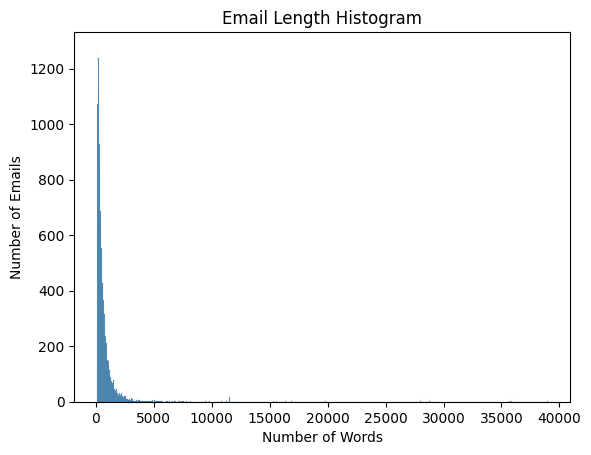

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.histplot(df_length['Email Length'])
ax.set(xlabel = "Number of Words", ylabel = "Number of Emails", title = "Email Length Histogram")

[Text(0.5, 0, 'Number of Words'),
 Text(0, 0.5, 'Number of Subjects'),
 Text(0.5, 1.0, 'Subject Length Histogram')]

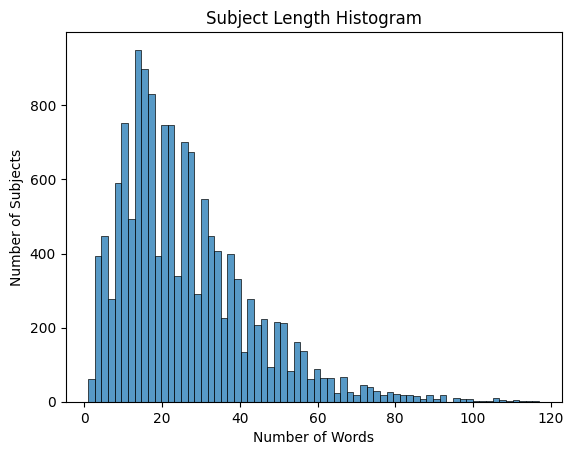

In [25]:
ax = sns.histplot(df_length['Subject Length'])
ax.set(xlabel = "Number of Words", ylabel = "Number of Subjects", title = "Subject Length Histogram")

[Text(0.5, 0, 'Number of Words'),
 Text(0, 0.5, 'Number of Subjects'),
 Text(0.5, 1.0, 'Subject Length Histogram')]

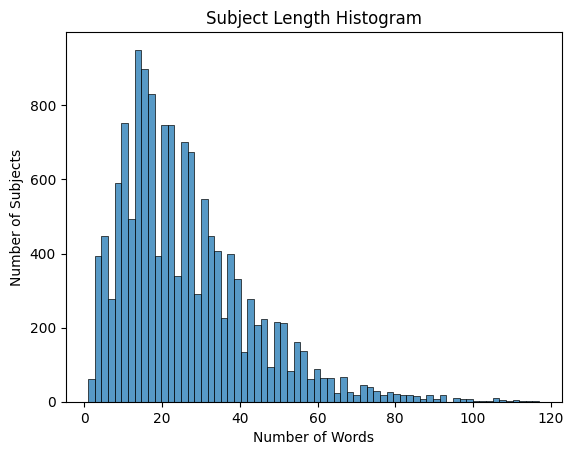

In [26]:
ax = sns.histplot(df_length['Subject Length'])
ax.set(xlabel = "Number of Words", ylabel = "Number of Subjects", title = "Subject Length Histogram")

[Text(0.5, 1.0, 'Correlation between Email Length and Subject Length')]

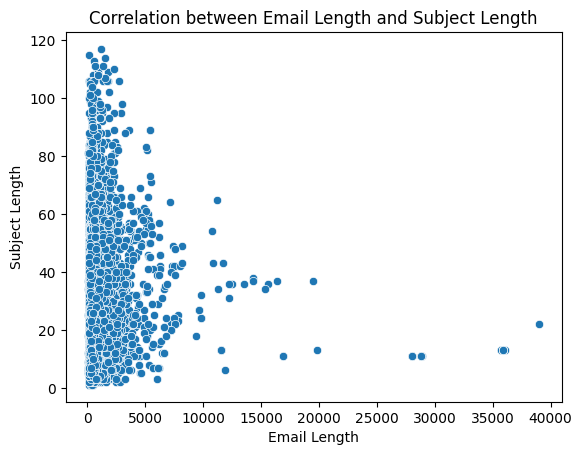

In [27]:
ax = sns.scatterplot(data=df_length, x="Email Length", y="Subject Length")
ax.set(title = "Correlation between Email Length and Subject Length")

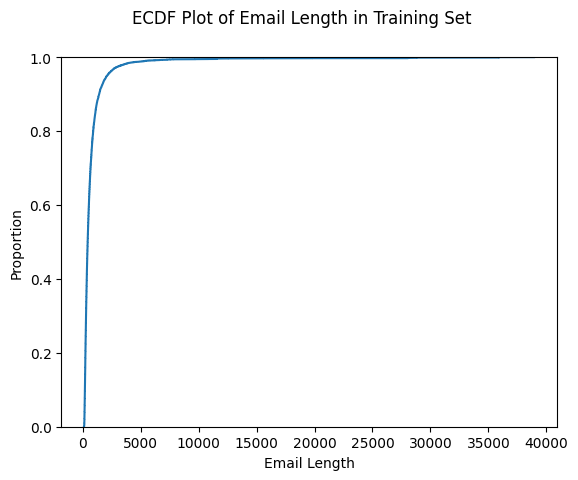

In [28]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Email Length in Training Set")
sns.ecdfplot(data=df_length, x=df_length['Email Length'])
plt.show()

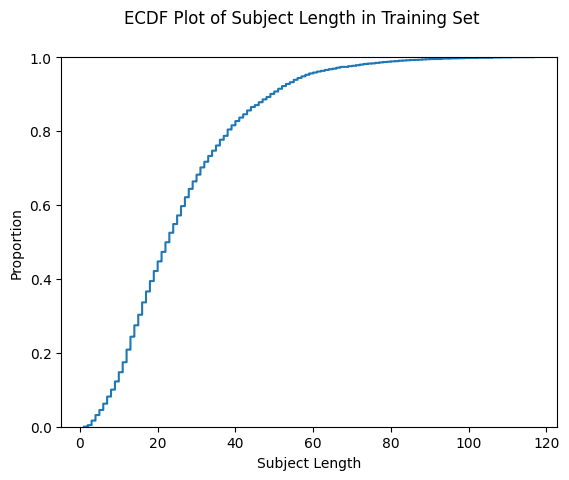

In [29]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Subject Length in Training Set")
sns.ecdfplot(data=df_length, x=df_length['Subject Length'])
plt.show()

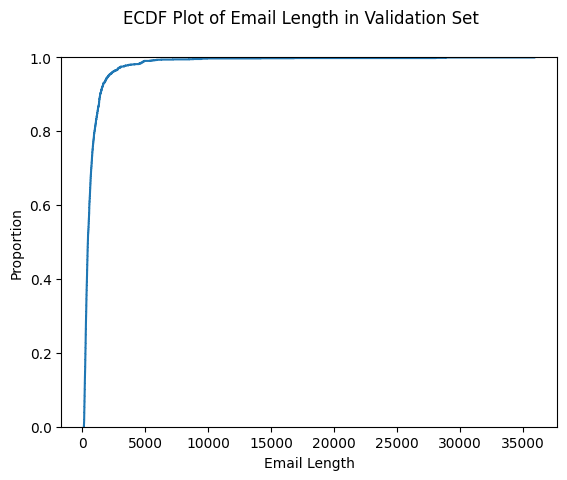

In [30]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Email Length in Validation Set")
sns.ecdfplot(data=df_val_length, x=df_val_length['Email Length'])
plt.show()

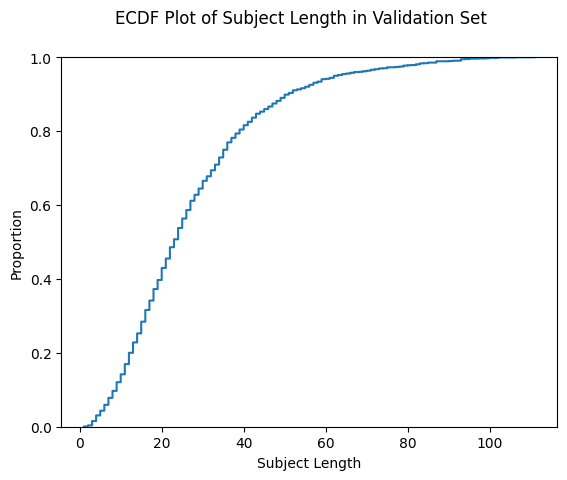

In [31]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Subject Length in Validation Set")
sns.ecdfplot(data=df_val_length, x=df_val_length['Subject Length'])
plt.show()

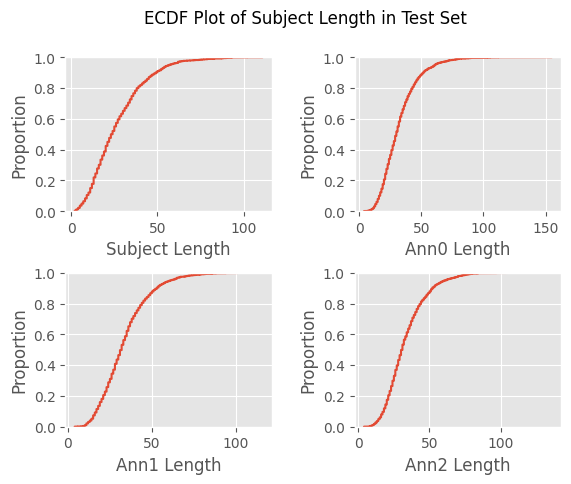

In [32]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Subject Length in Test Set")
plt.style.use('ggplot')
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.ecdfplot(data=df_test_length, x=df_test_length['Subject Length'])#,ax=ax)
ax.set(xlabel='Subject Length')
ax = fig.add_subplot(2, 2, 2)
sns.ecdfplot(data=df_test_length, x=df_test_length['Ann0'],ax=ax)
ax.set(xlabel='Ann0 Length')
ax = fig.add_subplot(2, 2, 3)
sns.ecdfplot(data=df_test_length, x=df_test_length['Ann1'],ax=ax)
ax.set(xlabel='Ann1 Length')
ax = fig.add_subplot(2, 2, 4)
sns.ecdfplot(data=df_test_length, x=df_test_length['Ann2'],ax=ax)
ax.set(xlabel='Ann2 Length')
plt.show()

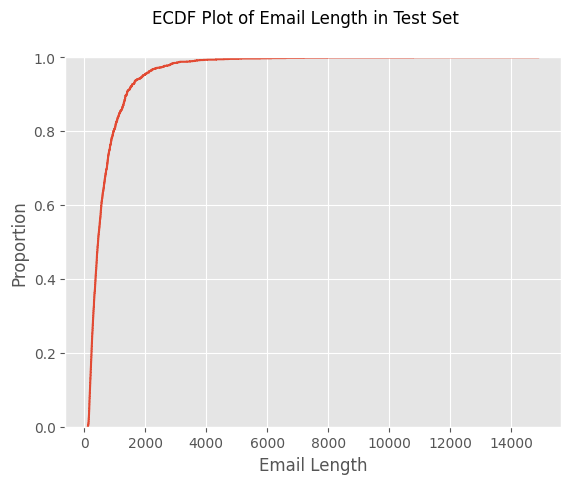

In [33]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Email Length in Test Set")
sns.ecdfplot(data=df_test_length, x=df_test_length['Email Length'])
plt.show()

In [34]:
!ls

AESLC  sample_data  test.csv  train.csv  val.csv


In [35]:
df = pd.read_csv("train.csv")
df_val = pd.read_csv("val.csv")
df_test = pd.read_csv("test.csv")

In [36]:
df_test.head()

,Unnamed: 0,Email,Subject,Ann0,Ann1,Ann2
0,0,eSource Presents Lexis-Nexis Training Basic ...,Lexis-Nexis Training: Houston & Worldwide / Do...,lexis-nexis training info,lexis-nexis basics clinic,lexis-nexis training basic
1,1,eSource Presents Lexis-Nexis Training Basic ...,Lexis-Nexis Training: Houston & Worldwide / Do...,lexis-nexis basics training in november,upcoming lexis-nexis basic training schedule a...,lexis-nexis training information
2,2,Hello All -- With all the uncertainty this has...,Natural Gas Strategic Profile,note of changes,preliminary criterial for evaluating prostects,review matrix for improvements
3,3,"Kim: I am looking to buy some good, used baby ...",Baby Furniture,in need of baby furniture,looking for used baby furniture.,"good, used baby furniture needed"
4,4,"As of start of business, Wednesday, February 6...",Quick Tips for the UBSWE migration,ubsw energy environment migration,enron questions,quick tips and reminders


In [37]:
print(df.Subject.map(lambda x: len(x)).max())
print(df_val.Subject.map(lambda x: len(x)).max())
print(df_test.Subject.map(lambda x: len(x)).max())

117
111
111


In [38]:
import torch
from torch.utils.data import Dataset, random_split, DataLoader
from transformers import GPT2Tokenizer, TrainingArguments, Trainer, GPT2LMHeadModel, DataCollatorForLanguageModeling #Seq2SeqTrainingArguments, Seq2SeqTrainer
import accelerate
import evaluate
#import bitsandbytes
from torch import nn
from transformers.trainer_pt_utils import get_parameter_names
import re

In [39]:
#!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [40]:
sacrebleu = evaluate.load("sacrebleu")
rouge = evaluate.load("rouge")
meteor = evaluate.load("meteor")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [41]:
torch.manual_seed(42)

In [42]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-medium', bos_token='<|startoftext|>',
                                          eos_token='<|endoftext|>', pad_token='<|pad|>', sep_token='<|sep|>')
model = GPT2LMHeadModel.from_pretrained('gpt2-medium').cuda()
model.resize_token_embeddings(len(tokenizer))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Embedding(50260, 1024)

In [43]:
datacollator = DataCollatorForLanguageModeling(tokenizer = tokenizer, mlm=False)

In [44]:
class EmailSubjectDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.input_ids = []
        self.attn_masks = []
        self.labels = []
        for index, row in data.iterrows():
            encodings_dict = tokenizer('<|startoftext|>' + row["Email"] + '<|sep|>' + row["Subject"] + '<|endoftext|>', truncation=True, max_length=250, padding="max_length", return_tensors='pt')
            self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
            self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx]

In [45]:
class ValEmailSubjectDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.input_ids = []
        self.attn_masks = []
        self.labels = []
        for index, row in data.iterrows():
          encodings_dict = tokenizer('<|startoftext|>' + row["Email"] + '<|sep|>', truncation=True, max_length=250, padding="max_length", return_tensors='pt')
          if((encodings_dict['input_ids'][0][249] != torch.Tensor(np.array([50259]))) and (encodings_dict['input_ids'][0][249] != torch.Tensor(np.array([50258])))):
            encodings_dict['input_ids'][0] = torch.cat((encodings_dict['input_ids'][0][np.r_[:249]],torch.Tensor(np.array([50258]))),0)
          self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
          self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx]

In [46]:
class TestEmailSubjectDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.input_ids = []
        self.attn_masks = []
        self.labels = []
        for index, row in data.iterrows():
          encodings_dict = tokenizer('<|startoftext|>' + row["Email"] + '<|sep|>', truncation=True, max_length=250, return_tensors='pt')
          self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
          self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx]

In [47]:
train_dataset = EmailSubjectDataset(df, tokenizer)
val_dataset = ValEmailSubjectDataset(df_val,tokenizer)

<ipython-input-44-b2797c85eddc>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
<ipython-input-44-b2797c85eddc>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))
<ipython-input-45-8a788ad2a56a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
<ipython-input-45-8a788ad2a56a>:11: UserWarning: To copy construct from a tensor, it is recommended

In [58]:
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    #eval_steps = 2,
    eval_steps = 400,
    save_steps=800,
    warmup_steps=500,
    load_best_model_at_end=True,
    #evaluation_strategy="steps",
    #save_strategy = "steps",
    eval_strategy="epoch",
    save_strategy = "epoch",
    weight_decay=0.01,
    metric_for_best_model = "rougeL",
    gradient_accumulation_steps=4,
    gradient_checkpointing=True,
    fp16=True,
    logging_dir='./logs',
    logging_steps=500,
    report_to = 'none',
    save_total_limit = 1
    )

In [59]:
def compute_metrics(eval_pred, eval_dataset, df):
    decoded_preds = []
    references = [df['Subject'], df['Ann0'], df['Ann1'], df['Ann2']]
    refs = []

    for i, sample_input in enumerate(eval_dataset):
        temp_input = sample_input[0][sample_input[0] !=torch.Tensor(np.array([50259]))]
        temp_input = temp_input[None, :]
        metric_outputs = model.generate(temp_input.cuda(), min_new_tokens = 4, max_new_tokens = 12, num_beams=5, early_stopping=True, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id)
        decoded_preds.append(tokenizer.decode(metric_outputs[0]))

    final_preds =[]
    for j in range(len(decoded_preds)):
        lst = decoded_preds[j].split('<|sep|>')
        if (len(lst) >= 2):
            final_preds.append(lst[1].replace("<|endoftext|>",""))
        temp_refs = []
        for k in range(len(references)):
            temp_refs.append(references[k][j])
        refs.append(temp_refs)

    results_sacrebleu = sacrebleu.compute(predictions=final_preds, references=refs, lowercase = True)

    results_rouge = rouge.compute(predictions=final_preds, references=refs)

    results_meteor = meteor.compute(predictions=final_preds, references=refs)

    return {'bleu': results_sacrebleu['score'], 'rouge1' : results_rouge['rouge1'], 'rouge2' : results_rouge['rouge2'], 'rougeL' : results_rouge['rougeL'], 'meteor' : results_meteor['meteor']}

In [60]:
def preprocess_logits_for_metrics(logits, labels):
    """
    Original Trainer may have a memory leak.
    This is a workaround to avoid storing too many tensors that are not needed.
    """
    pred_ids = torch.argmax(logits, dim=-1)
    return pred_ids, labels

In [61]:
trainer = Trainer(model=model, args=training_args, train_dataset=train_dataset, eval_dataset=val_dataset, data_collator=datacollator, compute_metrics = lambda pred: compute_metrics(pred, val_dataset, df_val), preprocess_logits_for_metrics = preprocess_logits_for_metrics)#, optimizers=(adam_bnb_optim, None))

In [52]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [53]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [55]:
#!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [56]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [62]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Bleu,Rouge1,Rouge2,Rougel,Meteor
0,No log,3.124058,26.665118,0.466403,0.303717,0.453934,0.410167
1,3.032200,3.017361,24.904067,0.465842,0.302915,0.451394,0.411500
2,2.828200,3.009029,25.242027,0.468058,0.299220,0.455116,0.405268


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


TrainOutput(global_step=1353, training_loss=2.863364163981661, metrics={'train_runtime': 6173.27, 'train_samples_per_second': 7.015, 'train_steps_per_second': 0.219, 'total_flos': 1.9629685383168e+16, 'train_loss': 2.863364163981661, 'epoch': 2.998337950138504})

In [63]:
test_dataset = TestEmailSubjectDataset(df_test,tokenizer)
len(test_dataset)

<ipython-input-46-fe53d240c21b>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
<ipython-input-46-fe53d240c21b>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))


1906

In [80]:
temp_output = []
for i, sample_input in enumerate(test_dataset):
    if(len(sample_input[0]) == 250 and sample_input[0][249] != torch.Tensor(np.array([50258]))):
        sample_input[0] = torch.cat((sample_input[0][np.r_[:249]],torch.Tensor(np.array([50258]))),0)
    sample_output = model.generate(sample_input.cuda(), min_new_tokens = 4, max_new_tokens = 12, num_beams=5, early_stopping=True, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id)
    temp_output.append(tokenizer.decode(sample_output[0]))
final_output =[]
for j in range(len(temp_output)):
    lst = temp_output[j].split('<|sep|>')
    if (len(lst) >= 2):
        final_output.append(lst[1].replace("<|endoftext|>",""))
    else:
        final_output.append("")

In [81]:
df_test["Generated"] = final_output
df_test.to_csv('generated.csv')

In [82]:
pred = df_test['Generated']
ref = [df_test['Subject'], df_test['Ann0'], df_test['Ann1'], df_test['Ann2']]

In [83]:
def score_evaluate(predictions, references):
    preds = []
    refs = []
    for i in range(len(predictions)):
        preds.append(predictions[i])
        temp_refs = []
        for j in range(len(references)):
            temp_refs.append(references[j][i])
        refs.append(temp_refs)
    results_sacrebleu = sacrebleu.compute(predictions=preds, references=refs, lowercase = True)
    print("Bleu Score : " + str(results_sacrebleu['score']))

    results_rouge = rouge.compute(predictions=preds, references=refs)
    print("Rouge1 Score : " + str(results_rouge['rouge1']))
    print("Rouge2 Score : " + str(results_rouge['rouge2']))
    print("RougeL Score : " + str(results_rouge['rougeL']))

    #results_meteor = meteor.compute(predictions=preds, references=refs)
    #print("Meteor Score : " + str(results_meteor['meteor']))

In [84]:
score_evaluate(pred,ref)

Bleu Score : 26.806691085035002
Rouge1 Score : 0.470788330951064
Rouge2 Score : 0.30731034314248046
RougeL Score : 0.456795713346804


In [85]:
def score_evaluate_meteor(predictions, references):
    preds = []
    refs = []
    for i in range(len(predictions)):
        preds.append(predictions[i])
        temp_refs = []
        for j in range(len(references)):
            temp_refs.append(references[j][i])
        refs.append(temp_refs)
    results_sacrebleu = sacrebleu.compute(predictions=preds, references=refs, lowercase = True)
    print("Bleu Score : " + str(results_sacrebleu['score']))

    results_rouge = rouge.compute(predictions=preds, references=refs)
    print("Rouge1 Score : " + str(results_rouge['rouge1']))
    print("Rouge2 Score : " + str(results_rouge['rouge2']))
    print("RougeL Score : " + str(results_rouge['rougeL']))

    results_meteor = meteor.compute(predictions=preds, references=refs)
    print("Meteor Score : " + str(results_meteor['meteor']))

In [86]:
score_evaluate_meteor(pred,ref)

Bleu Score : 26.806691085035002
Rouge1 Score : 0.470788330951064
Rouge2 Score : 0.30731034314248046
RougeL Score : 0.456795713346804
Meteor Score : 0.4072550108954102


In [79]:
model.save_pretrained("gpt2_medium_email_subject_summarizer")
tokenizer.save_pretrained("gpt2_medium_email_subject_summarizer")

('gpt2_medium_email_subject_summarizer/tokenizer_config.json',
 'gpt2_medium_email_subject_summarizer/special_tokens_map.json',
 'gpt2_medium_email_subject_summarizer/vocab.json',
 'gpt2_medium_email_subject_summarizer/merges.txt',
 'gpt2_medium_email_subject_summarizer/added_tokens.json')

In [65]:
from huggingface_hub import notebook_login

In [66]:
notebook_login()

In [67]:
repo_name="gpt2_medium_email_subject_summarizer"

model.push_to_hub(repo_name)
tokenizer.push_to_hub(repo_name)

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/kkasiviswanath/gpt2_medium_email_subject_summarizer/commit/e4611252d71e2f70af94352e1cd3b1ecdef2c02d', commit_message='Upload tokenizer', commit_description='', oid='e4611252d71e2f70af94352e1cd3b1ecdef2c02d', pr_url=None, pr_revision=None, pr_num=None)

In [68]:
def clean_subject(response):
    print(response)
    lst = response.split('<|sep|>')
    if (len(lst) >= 2):
        response = lst[1].replace("<|endoftext|>","")
    return response

In [69]:
def generate_subject(email:str):
    prompt = f"<|startoftext|> {email} <|sep|>"
    input_ids = tokenizer(prompt, return_tensors='pt')['input_ids'].to(model.device)
    sample_outputs = model.generate(
        input_ids,
        min_new_tokens = 4,
        max_new_tokens = 12,
        num_beams=5,
        early_stopping=True,
        num_return_sequences=1,
        pad_token_id=tokenizer.eos_token_id)
    subject = clean_subject(tokenizer.decode(sample_outputs[0]))
    return subject

In [70]:
example_email = "The following reports have been waiting for your approval for more than 4 days.Please review.Owner: James W Reitmeyer Report Name: JReitmeyer 10/24/01 Days In Mgr.Queue: 5"
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> The following reports have been waiting for your approval for more than 4 days.Please review.Owner: James W Reitmeyer Report Name: JReitmeyer 10/24/01 Days In Mgr.Queue: 5 <|sep|>Expense Reports Awaiting Your Approval<|endoftext|>
Generated Subject: Expense Reports Awaiting Your Approval


In [71]:
example_email = "All,  The below Analyst & Associate recruiting dates require ENA participation at Manager level at above.In order to resource each of your departments it is important to have ENA's involvement and participation in the interviews and debrief sessions on Fantastic Friday and Super Saturday events.These de-brief sessions will allow you the opportunity to select candidates you wish to join your groups.The target  is to assign potential candidates to business units and departments from the outset.As ENA has the highest percentage of A&A rotating in its business unit, the participation of ENA at interview should reflect this.Therefore, please encourage your direct reports and managers to participate in the below events in order to secure candidates for your business area.Associate Recruiting:		Saturday November 3						Total - 70 Candidates for Interview Analyst Recruiting:		Friday, November 16						Total - 70 Candidates for Interivew Associate Recruiting:		Saturday, December 1						Total - 70 Candidates for Interview  The above spreadsheet represents ENA's particpation today which I believe highlights the need for much additional support in these efforts.Please confirm by return participation of your respective groups.Regards,"
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> All,  The below Analyst & Associate recruiting dates require ENA participation at Manager level at above.In order to resource each of your departments it is important to have ENA's involvement and participation in the interviews and debrief sessions on Fantastic Friday and Super Saturday events.These de-brief sessions will allow you the opportunity to select candidates you wish to join your groups.The target  is to assign potential candidates to business units and departments from the outset.As ENA has the highest percentage of A&A rotating in its business unit, the participation of ENA at interview should reflect this.Therefore, please encourage your direct reports and managers to participate in the below events in order to secure candidates for your business area.Associate Recruiting:		Saturday November 3						Total - 70 Candidates for Interview Analyst Recruiting:		Friday, November 16						Total - 70 Candidates for Interivew Associate Recruiting:		Saturday, December 

In [72]:
example_email = "Late on October 25th, we received information about a nonspecific threat to the Enron Center.We communicated with law enforcement officials who found the threat unsubstantiated and without merit.Nonetheless we take all threats seriously and have increased the security presence at the Enron Center still further.Once again, if you observe suspicious behavior, please call security at 3-6200."
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> Late on October 25th, we received information about a nonspecific threat to the Enron Center.We communicated with law enforcement officials who found the threat unsubstantiated and without merit.Nonetheless we take all threats seriously and have increased the security presence at the Enron Center still further.Once again, if you observe suspicious behavior, please call security at 3-6200. <|sep|>Enron Center Security Update - October 25th<|endoftext|>
Generated Subject: Enron Center Security Update - October 25th


In [73]:
example_email = "Thanks in advance for agreeing to speak at the Global Operations Controller  Forum.There will be approximately 30 Enron business controllers present at  the meeting.All have responsibility for mid and back office operations for  the following Enron entities:  Enron North America, Enron Europe, Enron South  America, Enron Global Markets, Enron Industrial Markets, Enron Broadband  Services and Enron Energy Services.Attendees will be here from Houston,  Calgary, Tokyo, Sydney, London and New York (metals business).Attached for your reference is the agenda.There may be some slight changes  before the forum begins, but this will give you a good idea of the topics to  be covered and the other speakers who will address the group.You are scheduled to address the group as follows:"
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> Thanks in advance for agreeing to speak at the Global Operations Controller  Forum.There will be approximately 30 Enron business controllers present at  the meeting.All have responsibility for mid and back office operations for  the following Enron entities:  Enron North America, Enron Europe, Enron South  America, Enron Global Markets, Enron Industrial Markets, Enron Broadband  Services and Enron Energy Services.Attendees will be here from Houston,  Calgary, Tokyo, Sydney, London and New York (metals business).Attached for your reference is the agenda.There may be some slight changes  before the forum begins, but this will give you a good idea of the topics to  be covered and the other speakers who will address the group.You are scheduled to address the group as follows: <|sep|>Global Operations Controller Forum<|endoftext|>
Generated Subject: Global Operations Controller Forum


In [74]:
example_email = "To confirm:  Mark Thomas Mike Presley  both previously on the list for Netco's Market Risk/Research Group have resigned.I'm combing the Estate for replacements.DP"
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> To confirm:  Mark Thomas Mike Presley  both previously on the list for Netco's Market Risk/Research Group have resigned.I'm combing the Estate for replacements.DP <|sep|>Netco's Market Risk/Research Group<|endoftext|>
Generated Subject: Netco's Market Risk/Research Group


In [75]:
example_email = "Michelle;  This is the presentation which was provided to the HR VP's.The HR VPs were tasked with going off to met their BU OTCs and devise plans around the three components.We are currently collating those plans into one document.We'll send that along to you when completed.Pls call if you have any questions."
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> Michelle;  This is the presentation which was provided to the HR VP's.The HR VPs were tasked with going off to met their BU OTCs and devise plans around the three components.We are currently collating those plans into one document.We'll send that along to you when completed.Pls call if you have any questions. <|sep|>HR VP's Presentation to HR VP's<|endoftext|>
Generated Subject: HR VP's Presentation to HR VP's


In [76]:
example_email = """
All: Attached you will find a list that reflects your seat assignments for Business Continuity Planning (BCP).
These seats are located on the 30th and 31st Floors of Enron Center North (ECN).
As previously communicated, you will report to these designated seats in the event of an outage in ECS.
The exception to this is as follows: If your seat assignment is located on the 31st Floor, you will report to your original location that you occupied prior to your move into ECS.
This will hold true until the Monday after Thanksgiving, as we will have the 31st floor seats set up at that time.
Testing: Once you have moved to ECS, if you would like to test your BCP location, you will be able to test your seat for functionality every Thursday from 3-6pm.
Testing is not required, but is highly recommended.
If anyone has any questions or concerns about these procedures, please feel free to contact me at any time.
Regards,

@subject
BCP Seat Assignments

@ann0
your seat assignments for business continuity planning (bcp).

@ann1
bcp seat assignments

@ann2
here are your seat assignments for the business continuity planning event
"""
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> 
All: Attached you will find a list that reflects your seat assignments for Business Continuity Planning (BCP).
These seats are located on the 30th and 31st Floors of Enron Center North (ECN).
As previously communicated, you will report to these designated seats in the event of an outage in ECS.
The exception to this is as follows: If your seat assignment is located on the 31st Floor, you will report to your original location that you occupied prior to your move into ECS.
This will hold true until the Monday after Thanksgiving, as we will have the 31st floor seats set up at that time.
Testing: Once you have moved to ECS, if you would like to test your BCP location, you will be able to test your seat for functionality every Thursday from 3-6pm.
Testing is not required, but is highly recommended.
If anyone has any questions or concerns about these procedures, please feel free to contact me at any time.
Regards,

@subject
BCP Seat Assignments

@ann0
your seat assignments f

In [77]:
from transformers import pipeline

# Initialize the pipeline
pipe = pipeline("text-generation", model="kkasiviswanath/gpt2_medium_email_subject_summarizer")

config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/999k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/71.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [78]:

def generate_subject(email: str):
    prompt = f"<|startoftext|> {email} <|sep|>"

    # Use the pipeline to generate the text
    sample_outputs = pipe(prompt, max_new_tokens=12, num_beams=5, early_stopping=True, num_return_sequences=1)

    # The pipeline output is a list of dictionaries, so extract the generated text
    subject = clean_subject(sample_outputs[0]['generated_text'])
    return subject

def clean_subject(response):
    print(response)
    lst = response.split('<|sep|>')
    if (len(lst) >= 2):
        response = lst[1].replace("<|endoftext|>","")
    return response

# Example email
example_email = "The following reports have been waiting for your approval for more than 4 days. Please review. Owner: James W Reitmeyer Report Name: JReitmeyer 10/24/01 Days In Mgr.Queue: 5"

# Generate subject
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> The following reports have been waiting for your approval for more than 4 days. Please review. Owner: James W Reitmeyer Report Name: JReitmeyer 10/24/01 Days In Mgr.Queue: 5 <|sep|>Expense Reports Awaiting Your Approval
Generated Subject: Expense Reports Awaiting Your Approval


In [ ]:
# from transformers import pipeline

# # Initialize the pipeline
# pipe = pipeline("text-generation", model="kkasiviswanath/distilgpt2_email_subject_summarizer")

In [ ]:
# import torch

In [ ]:

# def generate_subject(email: str):
#     prompt = f"<|startoftext|> {email} <|sep|>"
#     input_ids = pipe.tokenizer(prompt, return_tensors='pt')['input_ids']
#     device = 'cuda' if torch.cuda.is_available() else 'cpu'
#     input_ids = input_ids.to(device)
#     pipe.model.to(device)
#     sample_outputs = pipe( input_ids=input_ids, min_new_tokens = 4, max_new_tokens=12, num_beams=5, early_stopping=True, num_return_sequences=1)

#     # The pipeline output is a list of dictionaries, so extract the generated text
#     generated_text = tokenizer.decode(sample_outputs[0], skip_special_tokens=True)
#     subject = clean_subject(generated_text)
#     return subject

# def clean_subject(response):
#     print(response)
#     lst = response.split('<|sep|>')
#     if (len(lst) >= 2):
#         response = lst[1].replace("<|endoftext|>","")
#     return response

# # Example email
# example_email = "The following reports have been waiting for your approval for more than 4 days. Please review. Owner: James W Reitmeyer Report Name: JReitmeyer 10/24/01 Days In Mgr.Queue: 5"

# # Generate subject
# generated_subject_res = generate_subject(example_email)
# print("Generated Subject:", generated_subject_res)